In [1]:
import os
import re
import pandas as pd

from collections import Counter
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_rows = 1000

## Data

In [2]:
data_dir = Path('../data/transfer/preprocessed/splits.en/en-shp/word')

In [3]:
lines = []
with open(data_dir / 'train.shp') as f:
    for line in f.read().split('\n'):
        if len(line):
            lines.append(line)
            
c = Counter((' '.join(lines)).split(' '))
d = []
for v, k in c.items():
    if k == 1:
        d.append(v)
S = len(lines)
T = len((' '.join(lines)).split(' '))
V = len(list(set((' '.join(lines)).split(' '))))
HLT = len(d)
print(f'shp -> S: {S} | T: {T} | V: {V} | HLT: {HLT}')

shp -> S: 7332 | T: 31222 | V: 4082 | HLT: 2421


In [4]:
31222 /37757

0.8269195116137404

In [5]:
lines = []
with open(data_dir / 'train.en') as f:
    for line in f.read().split('\n'):
        if len(line):
            lines.append(line)
            
c = Counter((' '.join(lines)).split(' '))
d = []
for v, k in c.items():
    if k == 1:
        d.append(v)
S = len(lines)
T = len((' '.join(lines)).split(' '))
V = len(list(set((' '.join(lines)).split(' '))))
HLT = len(d)
print(f'en -> S: {S} | T: {T} | V: {V} | HLT: {HLT}')

en -> S: 7332 | T: 37757 | V: 2644 | HLT: 1159


## Translate

In [22]:
results_dir = Path('../results/rnn')

In [94]:
train_res_dir = results_dir / 'translate'

In [95]:
errors = []
results_translate = pd.DataFrame(columns=['lang', 'corpus', 'segment', 'bleu'])
for folder in os.listdir(train_res_dir):
    #if '-shp' in folder:
        corpus_dir = train_res_dir / folder
        for segment in os.listdir(corpus_dir):
            segment_dir = corpus_dir / segment
            with open(segment_dir / 'train.log') as f:
                finds = re.findall('test bleu:(.*)\[', f.read())
                if len(finds):
                    bleu = float(finds[0])
                    results_translate.loc[-1] = [folder.split('_')[0], folder.split('_')[1], segment, bleu]
                    results_translate.index = results_translate.index + 1
                else:
                    errors.append(segment_dir)
        
    #print(folder)

In [96]:
errors

[]

In [97]:
errors

[]

In [98]:
results_translate['flag_drop'] = results_translate.segment.str.contains('drop') * 1

In [231]:
bpe_drop_vol_educ = results_translate.loc[(results_translate.segment.str.contains('bpe_drop')) &\
                                 (results_translate.corpus.str.contains('Educ')) &\
                                 (results_translate.lang.str.contains('es-shp')) &\
                                 (results_translate.flag_drop == 1)]
bpe_drop_vol_educ['n_oper'] = bpe_drop_vol_educ.segment.apply(lambda x: int(x.split('_')[-1]))
bpe_drop_vol_educ = bpe_drop_vol_educ.sort_values(by='n_oper').reset_index(drop=True)

/home/krivas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [100]:
bpe_vol_educ.head()

,lang,corpus,segment,bleu,flag_drop,n_oper,BPE Type
0,shp-es,Educativo,bpe_drop_1000,6.13,1,1000,With dropout
1,es-shp,Educativo,bpe_drop_1000,11.35,1,1000,With dropout
2,shp-es,Educativo,bpe_1000,9.58,0,1000,Without dropout
3,es-shp,Educativo,bpe_1000,15.60,0,1000,Without dropout
4,es-shp,Educativo,bpe_2000,16.38,0,2000,Without dropout


In [127]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

def plot_lg(corpus='Educ', lang='es-shp'):
    fig, ax = plt.subplots()
    bpe_vol_educ = results_translate.loc[(results_translate.segment.str.contains('bpe')) &\
                                     (results_translate.corpus.str.contains(corpus)) &\
                                     (results_translate.lang.str.contains(lang))]
    bpe_vol_educ['n_oper'] = bpe_vol_educ.segment.apply(lambda x: int(x.split('_')[-1]))
    bpe_vol_educ = bpe_vol_educ.sort_values(by='n_oper').reset_index(drop=True)
    bpe_vol_educ['BPE Type'] = bpe_vol_educ.flag_drop.replace({0: 'w/o dropout', 1: 'w/ dropout'})
    bpe_vol_educ['Legend'] = bpe_vol_educ['lang'].apply(lambda x: x.split('-')[0].replace('es', 'spa') + ' -> ' +  x.split('-')[1].replace('es', 'spa'))
    bpe_vol_educ['Legend'] = bpe_vol_educ['Legend'] + ' ' + bpe_vol_educ['BPE Type']
    ax = sns.lineplot(x='n_oper', y='bleu', data=bpe_vol_educ, hue='Legend', marker='o', ax=ax)
    plt.xlabel('# merge operations', fontsize=10)
    plt.ylabel('BLEU', fontsize=10)
    legend = ax.legend()
    legend.texts[0].set_text("")

/home/krivas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


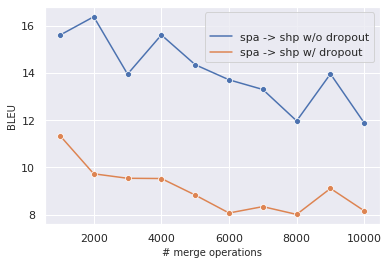

In [128]:
plot_lg(corpus='Educ', lang='es-shp')

/home/krivas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


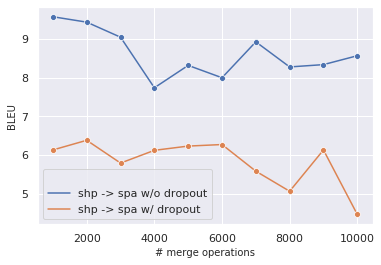

In [129]:
plot_lg(corpus='Educ', lang='shp-es')

/home/krivas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


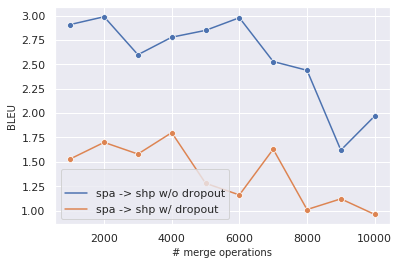

In [130]:
plot_lg(corpus='Rel', lang='es-shp')

/home/krivas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


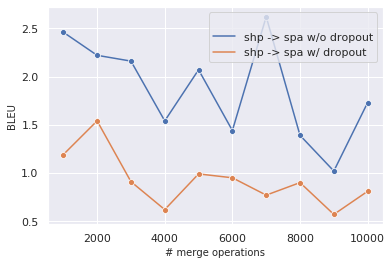

In [131]:
plot_lg(corpus='Rel', lang='shp-es')

/home/krivas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'BLEU')

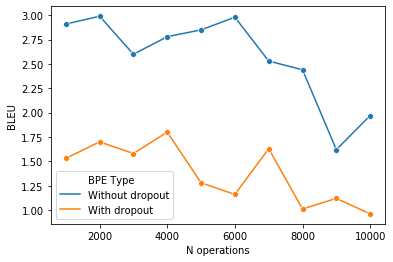

In [233]:
bpe_vol_educ = results_translate.loc[(results_translate.segment.str.contains('bpe')) &\
                                 (results_translate.corpus.str.contains('Relig')) &\
                                 (results_translate.lang.str.contains('es-shp'))]
bpe_vol_educ['n_oper'] = bpe_vol_educ.segment.apply(lambda x: int(x.split('_')[-1]))
bpe_vol_educ = bpe_vol_educ.sort_values(by='n_oper').reset_index(drop=True)
bpe_vol_educ['BPE Type'] = bpe_vol_educ.flag_drop.replace({0: 'Without dropout', 1: 'With dropout'})
sns.lineplot(x='n_oper', y='bleu', data=bpe_vol_educ, hue='BPE Type', marker='o')
plt.xlabel('N operations', fontsize=10)
plt.ylabel('BLEU', fontsize=10)

In [93]:
results_translate.groupby(['lang', 'corpus', 'segment']).max()

bleu
lang   corpus    segment              
es-shp Educativo bpe_1000        15.60
                 bpe_10000       11.88
                 bpe_2000        16.38
                 bpe_3000        13.95
                 bpe_4000        15.61
                 bpe_5000        14.35
                 bpe_6000        13.71
                 bpe_7000        13.30
                 bpe_8000        11.97
                 bpe_9000        13.96
                 bpe_drop_1000   11.35
                 bpe_drop_10000   8.16
                 bpe_drop_2000    9.73
                 bpe_drop_3000    9.54
                 bpe_drop_4000    9.53
                 bpe_drop_5000    8.83
                 bpe_drop_6000    8.07
                 bpe_drop_7000    8.34
                 bpe_drop_8000    8.01
                 bpe_drop_9000    9.11
                 char            10.41
                 word            14.69
       Religioso bpe_1000         2.91
                 bpe_10000        1.97
                 bpe_2000         2.99
                 bpe_3000         2.60
                 bpe_4000         2.78
                 bpe_5000         2.85
                 bpe_6000         2.98
                 bpe_7000         2.53
                 bpe_8000         2.44
                 bpe_9000         1.62
                 bpe_drop_1000    1.53
                 bpe_drop_10000   0.96
                 bpe_drop_2000    1.70
                 bpe_drop_3000    1.58
                 bpe_drop_4000    1.80
                 bpe_drop_5000    1.28
                 bpe_drop_6000    1.16
                 bpe_drop_7000    1.63
                 bpe_drop_8000    1.01
                 bpe_drop_9000    1.12
                 char             1.09
                 word             1.75
shp-es Educativo bpe_1000         9.58
                 bpe_10000        8.57
                 bpe_2000         9.44
                 bpe_3000         9.05
                 bpe_4000         7.74
                 bpe_5000         8.32
                 bpe_6000         8.00
                 bpe_7000         8.93
                 bpe_8000         8.28
                 bpe_9000         8.34
                 bpe_drop_1000    6.13
                 bpe_drop_10000   4.46
                 bpe_drop_2000    6.38
                 bpe_drop_3000    5.79
                 bpe_drop_4000    6.12
                 bpe_drop_5000    6.23
                 bpe_drop_6000    6.27
                 bpe_drop_7000    5.58
                 bpe_drop_8000    5.06
                 bpe_drop_9000    6.13
                 char             6.84
                 word             8.15
       Religioso bpe_1000         2.46
                 bpe_10000        1.73
                 bpe_2000         2.22
                 bpe_3000         2.16
                 bpe_4000         1.54
                 bpe_5000         2.07
                 bpe_6000         1.44
                 bpe_7000         2.62
                 bpe_8000         1.39
                 bpe_9000         1.02
                 bpe_drop_1000    1.19
                 bpe_drop_10000   0.81
                 bpe_drop_2000    1.54
                 bpe_drop_3000    0.91
                 bpe_drop_4000    0.62
                 bpe_drop_5000    0.99
                 bpe_drop_6000    0.95
                 bpe_drop_7000    0.77
                 bpe_drop_8000    0.90
                 bpe_drop_9000    0.57
                 char             0.00
                 word             1.87

In [48]:
!find ../ -name *ipynb_checkpoints* -exec rm -rf {} \;

find: ‘../nb/.ipynb_checkpoints’: No such file or directory


In [76]:
errors = []
transfer_res_dir = results_dir / 'transfer_baseline'
results_transfer = pd.DataFrame(columns=['lang', 'corpus', 'segment', 'bleu'])
for folder in os.listdir(transfer_res_dir):
    corpus_dir = transfer_res_dir / folder
    for segment in os.listdir(corpus_dir):
            segment_dir = corpus_dir / segment
            with open(segment_dir / 'train.log') as f:
                finds = re.findall('test bleu:(.*)\[', f.read())
                if len(finds):
                    bleu = float(finds[0])
                    results_transfer.loc[-1] = [folder.split('_')[0], folder.split('_')[1], segment, bleu]
                    results_transfer.index = results_transfer.index + 1
                else:
                    errors.append(segment_dir)
        
    print(folder)

es-shp_300_512
shp-es_300_512
en-shp_300_512
shp-en_300_512


In [77]:
errors

[]

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

def plot_lg_trans(corpus='Educ', lang='es-shp'):
    fig, ax = plt.subplots()
    bpe_vol_educ = results_transfer.loc[(results_transfer.segment.str.contains('bpe')) &\
                                     (results_transfer['lang'].str.contains(lang))]
    bpe_vol_educ['n_oper'] = bpe_vol_educ.segment.apply(lambda x: int(x.split('_')[-1]))
    bpe_vol_educ = bpe_vol_educ.sort_values(by='n_oper').reset_index(drop=True)
    bpe_vol_educ['BPE Type'] = bpe_vol_educ.flag_drop.replace({0: 'w/o dropout', 1: 'w/ dropout'})
    bpe_vol_educ['Legend'] = bpe_vol_educ['lang'].apply(lambda x: x.split('-')[0].replace('es', 'spa') + ' -> ' +  x.split('-')[1].replace('es', 'spa'))
    bpe_vol_educ['Legend'] = bpe_vol_educ['Legend'] + ' ' + bpe_vol_educ['BPE Type']
    ax = sns.lineplot(x='n_oper', y='bleu', data=bpe_vol_educ, hue='Legend', marker='o', ax=ax)
    plt.xlabel('# merge operations', fontsize=10)
    plt.ylabel('BLEU', fontsize=10)
    legend = ax.legend()
    legend.texts[0].set_text("")

In [140]:
results_transfer['flag_drop'] = results_transfer.segment.str.contains('drop') * 1

/home/krivas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


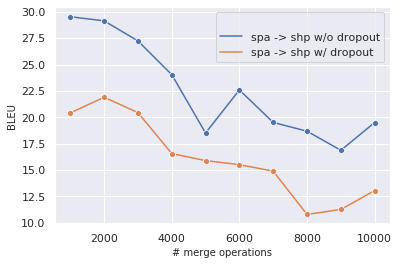

In [141]:
plot_lg_trans(corpus='Educ', lang='es-shp')

/home/krivas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


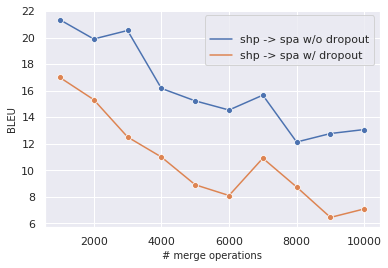

In [142]:
plot_lg_trans(corpus='Educ', lang='shp-es')

/home/krivas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


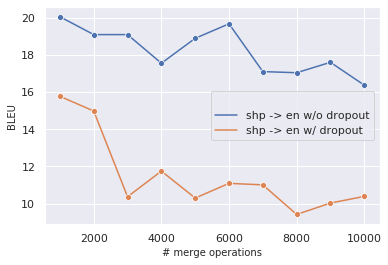

In [143]:
plot_lg_trans(corpus='Educ', lang='shp-en')

/home/krivas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


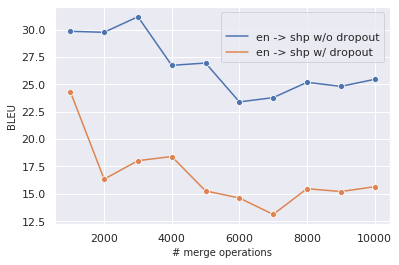

In [144]:
plot_lg_trans(corpus='Educ', lang='en-shp')

In [78]:
results_transfer.groupby(['lang', 'corpus', 'segment']).max()

bleu
lang   corpus segment              
en-shp 300    bpe_1000        29.85
              bpe_10000       25.46
              bpe_2000        29.76
              bpe_3000        31.18
              bpe_4000        26.74
              bpe_5000        26.95
              bpe_6000        23.40
              bpe_7000        23.79
              bpe_8000        25.19
              bpe_9000        24.82
              bpe_drop_1000   24.35
              bpe_drop_10000  15.65
              bpe_drop_2000   16.34
              bpe_drop_3000   18.03
              bpe_drop_4000   18.41
              bpe_drop_5000   15.27
              bpe_drop_6000   14.62
              bpe_drop_7000   13.12
              bpe_drop_8000   15.47
              bpe_drop_9000   15.21
              char            27.78
              word            23.43
es-shp 300    bpe_1000        29.53
              bpe_10000       19.50
              bpe_2000        29.14
              bpe_3000        27.24
              bpe_4000        24.04
              bpe_5000        18.51
              bpe_6000        22.59
              bpe_7000        19.51
              bpe_8000        18.68
              bpe_9000        16.87
              bpe_drop_1000   20.41
              bpe_drop_10000  13.05
              bpe_drop_2000   21.90
              bpe_drop_3000   20.44
              bpe_drop_4000   16.56
              bpe_drop_5000   15.89
              bpe_drop_6000   15.51
              bpe_drop_7000   14.89
              bpe_drop_8000   10.79
              bpe_drop_9000   11.26
              char            33.24
              word            20.97
shp-en 300    bpe_1000        20.05
              bpe_10000       16.37
              bpe_2000        19.09
              bpe_3000        19.09
              bpe_4000        17.55
              bpe_5000        18.89
              bpe_6000        19.67
              bpe_7000        17.10
              bpe_8000        17.04
              bpe_9000        17.60
              bpe_drop_1000   15.77
              bpe_drop_10000  10.39
              bpe_drop_2000   14.98
              bpe_drop_3000   10.37
              bpe_drop_4000   11.75
              bpe_drop_5000   10.30
              bpe_drop_6000   11.09
              bpe_drop_7000   11.01
              bpe_drop_8000    9.42
              bpe_drop_9000   10.03
              char            20.90
              word            17.71
shp-es 300    bpe_1000        21.34
              bpe_10000       13.07
              bpe_2000        19.89
              bpe_3000        20.53
              bpe_4000        16.17
              bpe_5000        15.23
              bpe_6000        14.54
              bpe_7000        15.66
              bpe_8000        12.13
              bpe_9000        12.77
              bpe_drop_1000   16.99
              bpe_drop_10000   7.09
              bpe_drop_2000   15.32
              bpe_drop_3000   12.51
              bpe_drop_4000   11.00
              bpe_drop_5000    8.91
              bpe_drop_6000    8.10
              bpe_drop_7000   10.91
              bpe_drop_8000    8.74
              bpe_drop_9000    6.45
              char            25.16
              word            15.13

# Transfer

In [79]:
transfer_res_dir = results_dir / 'transfer_top'

In [80]:
!find ../ -name *ipynb_checkpoints* -exec rm -rf {} \;

find: ‘../nb/.ipynb_checkpoints’: No such file or directory


In [83]:
errors = []
results_transfer_top = pd.DataFrame(columns=['lang', 'corpus', 'segment', 'bleu'])
for folder in os.listdir(transfer_res_dir):
    corpus_dir = transfer_res_dir / folder
    for split in os.listdir(corpus_dir):
        split_dir = corpus_dir / split
        for segment in os.listdir(split_dir):
            segment_dir = split_dir / segment
            if os.path.exists(segment_dir / 'train.log'):
                with open(segment_dir / 'train.log') as f:
                    finds = re.findall('test bleu:(.*)\[', f.read())
                    if len(finds):
                        bleu = float(finds[0])
                        results_transfer_top.loc[-1] = [folder, split.split('_')[0], segment, bleu]
                        results_transfer_top.index = results_transfer_top.index + 1
                    else:
                        errors.append(segment_dir)
            else:
                errors.append(segment_dir)
        
    print(folder)

splits.es
splits.en


In [84]:
errors

[PosixPath('../results/rnn/transfer_top/splits.es/es-pl_300_512/char'),
 PosixPath('../results/rnn/transfer_top/splits.es/es-pl_300_512/word'),
 PosixPath('../results/rnn/transfer_top/splits.es/es-pl_300_512/bpe_5000'),
 PosixPath('../results/rnn/transfer_top/splits.es/es-pl_300_512/bpe_drop_5000'),
 PosixPath('../results/rnn/transfer_top/splits.es/es-tr_300_512/char'),
 PosixPath('../results/rnn/transfer_top/splits.es/es-tr_300_512/word'),
 PosixPath('../results/rnn/transfer_top/splits.es/es-tr_300_512/bpe_5000'),
 PosixPath('../results/rnn/transfer_top/splits.es/es-tr_300_512/bpe_drop_5000'),
 PosixPath('../results/rnn/transfer_top/splits.en/en-tr_300_512/char'),
 PosixPath('../results/rnn/transfer_top/splits.en/en-tr_300_512/word'),
 PosixPath('../results/rnn/transfer_top/splits.en/en-tr_300_512/bpe_5000'),
 PosixPath('../results/rnn/transfer_top/splits.en/en-tr_300_512/bpe_drop_5000')]

In [86]:
results_transfer_top.groupby(['lang', 'corpus', 'segment']).max()

bleu
lang      corpus segment             
splits.en en-lt  bpe_5000       28.04
                 bpe_drop_5000  17.64
                 char           30.81
                 word           27.06
          en-mr  bpe_5000       28.60
                 bpe_drop_5000  17.66
                 char           26.59
                 word           27.48
          en-tk  bpe_5000       23.03
                 bpe_drop_5000  16.01
                 char           27.16
                 word           26.45
splits.es es-fi  bpe_5000       15.38
                 bpe_drop_5000   8.77
                 char           27.60
                 word           13.58
          es-hu  bpe_5000       13.97
                 bpe_drop_5000  10.44
                 char           26.14
                 word           13.10
          es-ru  bpe_5000       13.36
                 bpe_drop_5000  10.56
                 char           28.15
                 word           12.52

In [79]:
finds

['  28.15 ']

In [65]:
errors

[]

In [66]:
results_transfer

,lang,corpus,segment,bleu
7,es-shp,300,char,21.13
6,es-shp,300,word,23.86
5,es-shp,300,bpe_5000,25.85
4,es-shp,300,bpe_drop_5000,18.51
3,en-shp,300,char,18.66
2,en-shp,300,word,32.75
1,en-shp,300,bpe_5000,30.31
0,en-shp,300,bpe_drop_5000,17.47
